## Universal Representation Theorem - Gradient Descent Optimisation

Here we study the possibility to represent functions with a MLP with a single hidden layer (n1 hidden units).
As activation functions, we use the sigmoid ('logit') function.

Then, we generate training data - by assuming a function on the unit interval [0,1]. Here, we provide to families of functions:
* Beta distribution function: $b_{\alpha,\beta}(x)=x^\alpha\cdot(1-x)^\beta$
* Sine function: $sin_\omega(x)=\sin(2\pi\omega\cdot x)$

Finally, we use mini-batch-gradient descent to minimize MSE cost.

Goals:
* Learn how a given function can be represented with a single layer MLP;
* Understand that, in principle, it can be learned from sample data;
* Understand that the optimization by using plain gradient (MBGD) is not always straightforward; 
* Experience that the choice of the hyper-parameters number of hidden units, batchsize, learning rate is tricky. 


#### Plot Utility

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_function(x,y):
    plt.plot(x, y)
    plt.xlabel('x')
    plt.show()
    
def plot_compare_function(x,y1,y2, label1='', label2=''):
    plt.plot(x, y1, label=label1)
    plt.xlabel('x')
    plt.plot(x, y2, label=label2)
    if label1 and label2:
        plt.legend()
    plt.show()


### Model

In [2]:
def sigmoid(z):
    return 1. / (1. + np.exp(-z))

In [3]:
def predict(X,W1,b1,W2,b2):
    """
    Computes the output for the single hidden layer network (n1 units) with 1d input and 1d output.
    
    Arguments:
    W1 -- weights of the hidden layer with shape (n1,1)
    b1 -- biases of the hidden units with shape (n1,1)
    W2 -- weights of the output layer with shape (1,n1)
    b2 -- bias of the output
    X  -- input data with m samples and shape (1,m)
    
    Returns:
    A2 -- Output from the network of shape (1,m) 
    
    """
    
    ### START YOUR CODE ###
    A2 = np.dot(W2, sigmoid(np.dot(W1, X) + b1))+ b2
    ### END YOUR CODE ###
    
    return A2

#### TEST - Prediction

In [4]:
W1 = np.array([0.4,0.2,-0.4]).reshape(3,1) # n1 = 3
b1 = np.array([0.1,0.1,0.1]).reshape(3,1)
W2 = np.array([1,2,1]).reshape(1,3)
b2 = -1
X = np.linspace(-1,1,5).reshape((1,5))
Ypred = predict(X,W1,b1,W2,b2)
Yexp = np.array([0.99805844, 1.04946333, 1.09991675, 1.14913132, 1.19690185]).reshape(1,5)
np.testing.assert_array_almost_equal(Ypred,Yexp,decimal=8)

#### Cost

In [5]:
def cost(X,Y,W1,b1,W2,b2):
    """
    Computes the MSE cost for a single hidden layer network with 1d input and 1d output.
    Uses the predict function defined above.
    
    Arguments:
    W1 -- weights of the hidden layer with shape (n1,1)
    b1 -- biases of the hidden units with shape (n1,1)
    W2 -- weights of the output layer with shape (1,n1)
    b2 -- bias of the output
    X -- input data with shape (1,m)
    Y -- labels with shape (1,m) 
    
    Returns:
    cost -- the MSE cost divided by 2.
    """
    ### START YOUR CODE ###
    m = X.shape[1]
    #using function 1/2m * sum( (h(x) - y)^2 )
    #using mean is the same as dividing by m
    cost = 1/2.0 * ((predict(X, W1, b1, W2, b2)-Y)**2).mean()
    ### END YOUR CODE ###
    return cost

#### TEST - Cost

In [6]:
W1 = np.array([4,5,6]).reshape(3,1)
W2 = np.array([1,2,3]).reshape(1,3)
b1 = np.array([1,1,1]).reshape(3,1)
b2 = 2
X = np.linspace(-1,1,5).reshape(1,5)
Y = 2.0*np.ones(5).reshape(1,5)
c = cost(X,Y,W1,b1,W2,b2)
cexp = 9.01669099
np.testing.assert_almost_equal(c,cexp,decimal=8)

#### Gradient

In [27]:
def gradient(W1,b1,W2,b2,X,Y):
    """
    Computes the gradient of the MSE cost for a single hidden layer network with 1d input and 1d output.
    The parts of the gradient associated with the weights array and bias array for the hidden layer, 
    the weights array and the bias for the output layer are provided as separate numpy arrays of according 
    dimension. 
    
    Arguments:    
    W1 -- weights of hidden layer with shape (n1,1)
    b1  -- biases of hidden layer with shape (n1,1)
    W2 -- weights of output layer with shape (1,n1)
    b2  -- biases of output layer
    X  -- input data with shape (1,m)
    Y  -- labels with shape (1,m)
    
    Returns:
    gradient -- dictionary with the gradients w.r.t. W1, W2, b1, b2 and according keys 
                'dW1' with shape (n1,1)
                'db1' with shape (n1,1)
                'dW2' with shape (1,n1)
                'db2' a scalar
    """
    ### START YOUR CODE ###
    m = Y.shape[1]
    Yhat = predict(X, W1, b1, W2, b2)
    sig = sigmoid(W1*X+b1)
    
    dW1 = (1/m) * W2.T * np.sum((Yhat-Y) * sig * (1-sig) * X, axis=1).reshape(W1.shape)
    dW2 = (1/m) * np.sum((Yhat-Y) * sig, axis=1).reshape(W2.shape)
    db1 = (1/m) * W2.T * np.sum((Yhat-Y) * sig * (1-sig), axis=1).reshape(b1.shape)
    db2 = (1/m) * np.sum(Yhat-Y)
    ### END YOUR CODE ###
    
    return {'dW1':dW1, 'dW2':dW2, 'db1':db1, 'db2':db2}

#### TEST - Gradient

In [28]:
W1 = np.array([4,5,6]).reshape(3,1)
W2 = np.array([1,2,3]).reshape(1,3)
b1 = np.array([1,1,1]).reshape(3,1)
b2 = 2
X = np.array([1,2,3,4,5,6,7]).reshape((1,7))
Y = np.array([2,2,2,2,2,2,2]).reshape((1,7))
gradJ = gradient(W1,b1,W2,b2,X,Y)
dW1exp = np.array([0.00590214,0.00427602,0.00234663]).reshape(W1.shape)
db1exp = np.array([0.00579241,0.004247,0.00234079]).reshape(b1.shape)
dW2exp = np.array([5.99209251,5.99579451,5.99714226]).reshape(W2.shape)
db2exp = 5.99792323
np.testing.assert_array_almost_equal(gradJ['dW1'],dW1exp,decimal=8)
np.testing.assert_array_almost_equal(gradJ['db1'],db1exp,decimal=8)
np.testing.assert_array_almost_equal(gradJ['dW2'],dW2exp,decimal=8)
np.testing.assert_almost_equal(gradJ['db2'],db2exp,decimal=8)

#### Training Loop

In [22]:
def train(X,Y,n1,nepochs,batchsize=32,learning_rate=0.1):
    """
    Performs the training by using MBGD for a MLP with a single hidden layer (n1 units) and 1d input and output layer.
    
    It starts with initializing the parameters:
    * the weights and the biases for the hidden units : W1,b1 of shape (n1,1) 
    * the weights and the bias for the output layer: W2 of shape (1,n1) and scalar b2 

    Then, it loops over the epochs and per epoch over the mini-batches. The number of batches is determined from the 
    batchsize.
    """
    # initialize weights
    W1 = np.random.uniform(-1,1,n1).reshape(n1,1)*0.05
    b1 = np.zeros((n1,1),dtype='float')
    W2 = np.random.uniform(-1,1,n1).reshape(1,n1)*0.05
    b2 = 0.0
    
    m = X.shape[1]
    mb = int(m/batchsize)
    indices = np.arange(m)
    #np.random.shuffle(indices)
    
    # remember the epoch id and cost after each epoch for constructing the learning curve at the end
    costs = [] 
    epochs = []

    # Initial cost value:
    epochs.append(0)
    costs.append(cost(X,Y,W1,b1,W2,b2)) 
    
    # training loop
    for epoch in range(nepochs):
        
        ### START YOUR CODE ###
        np.random.shuffle(indices)
        
        for j in range(0,m,batchsize):
            Xtrain = X[:, j:j+batchsize]
            Ytrain = Y[:, j:j+batchsize]
            
            dws = gradient(W1,b1,W2,b2,Xtrain,Ytrain)
            W1 = W1 - learning_rate * dws["dW1"]
            b1 = b1 - learning_rate * dws["db1"]
            W2 = W2 - learning_rate * dws["dW2"]
            b2 = b2 - learning_rate * dws["db2"]
        
        ### END YOUR CODE ###
        epochs.append(epoch+1)
        costs.append(cost(X,Y,W1,b1,W2,b2))        
    
    print(costs[-1])    
    params = {'W1':W1, 'W2':W2,'b1':b1,'b2':b2}    
    return params, np.array(epochs), np.array(costs)

#### TEST - No simple test for the training loop....

### Generation of the Training Data 

In [23]:
def beta_fct(x,alpha,beta):
    """
    Parameters:
    x - input array
    alpha, beta -- larger values lead to more pronounced peaks
    """
    c = alpha/(alpha+beta)
    norm = c**alpha*(1-c)**beta
    return x**alpha*(1-x)**beta/norm

In [24]:
def sin_fct(x,omega):
    """
    Parameters:
    x -- input array
    omega -- frequency (~number of cycles within the unit interval)
    """
    return np.sin(x*2*np.pi*omega)

In [25]:
def generate_inputs(m, func, random=True, vargs=None):
    """
    Generates m (x,y=f(x))-samples by either generating random x-values in the unit interval (random=True) or by 
    generating a grid of such values. Then the y values (used as labels below) are created from the function object 
    `func`.
    Parameter needed to define the function `func` can be passed as vargs-dict. 
    """
    if random:
        x = np.random.rand(1,m)
        y = func(x, **vargs)
    else:
        x = np.linspace(0,1,m).reshape(1,m)
        y = func(x,**vargs)
    return x,y

In [26]:
m = 1000
func = beta_fct
vargs={'alpha':2.0,'beta':2.0}
#func = sin_fct
#vargs={'omega':3.0}

X,Y = generate_inputs(m,func,vargs=vargs)

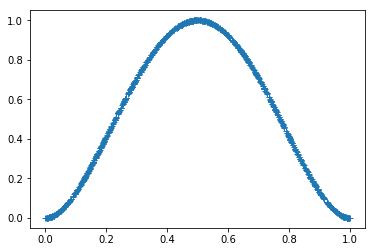

In [27]:
plt.plot(X[0,:],Y[0,:],'+')

### Normalize the Input and Output

It turns out that it is important to normalize the input and the output data here.
Remember the mu's and sigma's so that you can also apply it to the test data below!

In [29]:
def normalize(X, mu=None, stdev=None):
    """
    Normalizes the data X. If not provided, mu and sigma is computed.
    
    Returns:
    X1 -- normalized data (array of the same shape as input)
    mu -- mean
    stdev -- standard deviation
    """
    ### START YOUR CODE ###
    if mu == None:
        mu = np.mean(X)
    if stdev == None:
        stdev  = np.std(X, ddof=1)
    X1 = (X - mu)/stdev
    ### END YOUR CODE ###
    
    return X1,mu,stdev

In [30]:
def inv_normalize(X1, mu, stdev):
    """
    Invert the normalization.

    Returns:
    X -- unnormalized data (array of the same shape as input X1)
    """
    ### START YOUR CODE ###
    X = X1 * stdev + mu
    ### END YOUR CODE ###
    
    return X

In [31]:
# Input Normalization (average muX and standard deviation stdevX)
X1, muX, stdevX = normalize(X)

# Output Normalization (average muY and standard deviation stdevY)
Y1, muY, stdevY = normalize(Y)

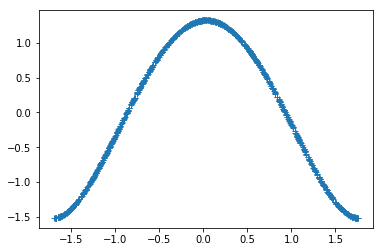

In [32]:
plt.plot(X1[0,:],Y1[0,:],'+')

### Perform the Training

0.0004337529442609623


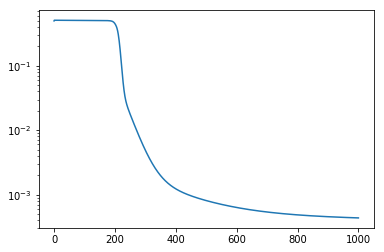

In [33]:
# Use the normalized inputs and outputs
n1 = 10 # number of hidden units
nepochs = 1000 # number of epochs
batchsize = 32
learning_rate = 0.1

### START YOUR CODE ###
params, epochs, costs = train(X1,Y1,n1,nepochs,batchsize,learning_rate)
### END YOUR CODE ###

plt.semilogy(epochs,costs)

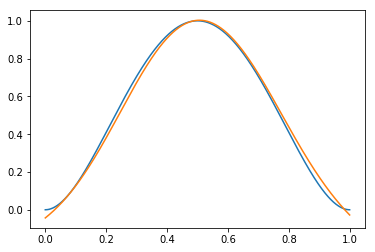

In [40]:
mtest = 1000
Xtest,Ytest = generate_inputs(mtest, func, random=False, vargs=vargs)

# Do the prediction with the trained model

### START YOUR CODE ###
Xtest, muX, stdevX = normalize(Xtest, muX, stdevX)
Ypred = predict(Xtest, params['W1'], params['b1'], params['W2'], params['b2'])

Xtest = inv_normalize(Xtest, muX, stdevX)
Ypred = inv_normalize(Ypred, muY, stdevY)
### END YOUR CODE ###

plt.plot(Xtest[0,:],Ytest[0,:])
plt.plot(Xtest[0,:],Ypred[0,:])